In [1]:
%matplotlib inline

# Hough transform


The classical Hough transform was developed to identify lines in the image, but later the Hough transform has been extended to identify the positions of arbitrary shapes, most commonly circles or ellipses.

"In many cases an edge detector can be used as a pre-processing stage to obtain image points or image pixels that are on the desired curve in the image space. Due to imperfections in either the image data or the edge detector, however, there may be missing points or pixels on the desired curves as well as spatial deviations between the ideal line/circle/ellipse and the noisy edge points as they are obtained from the edge detector. For these reasons, it is often non-trivial to group the extracted edge features to an appropriate set of lines, circles or ellipses. The purpose of the Hough transform is to address this problem by making it possible to perform groupings of edge points into object candidates by performing an explicit voting procedure over a set of parameterized image objects." - ***wiki - Hough transform***.

The Hough transform in its simplest form is a method to detect straight lines[1]_.

In the following example, we construct an image with a line intersection. We then use the `Hough transform  <https://en.wikipedia.org/wiki/Hough_transform>`__. to explore a parameter space for straight lines that may run through the image.

### Preprocessing

Images that will be processed by some implementations of the Hough transform are usually preprocessed with tha ***Canny Edge Detector***: https://docs.opencv.org/3.1.0/da/d22  The OpenCV docs are in: https://docs.opencv.org/3.1.0/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de/tutorial_py_canny.html


Algorithm overview
------------------

Usually, lines are parameterised as $y = mx + c$, with a gradient
$m$ and y-intercept `c`. However, this would mean that $m$ goes to
infinity for vertical lines. Instead, we therefore construct a segment
perpendicular to the line, leading to the origin. The line is represented by
the length of that segment, $r$, and the angle it makes with the x-axis,
$\theta$.

The Hough transform constructs a histogram array representing the parameter
space (i.e., an $M \times N$ matrix, for $M$ different values of
the radius and $N$ different values of $\theta$).  For each
parameter combination, $r$ and $\theta$, we then find the number of
non-zero pixels in the input image that would fall close to the corresponding
line, and increment the array at position $(r, \theta)$ appropriately.

We can think of each non-zero pixel "voting" for potential line candidates. The
local maxima in the resulting histogram indicates the parameters of the most
probably lines. In our example, the maxima occur at 45 and 135 degrees,
corresponding to the normal vector angles of each line.

Another approach is the Progressive Probabilistic Hough Transform [2]_. It is
based on the assumption that using a random subset of voting points give a good
approximation to the actual result, and that lines can be extracted during the
voting process by walking along connected components. This returns the
beginning and end of each line segment, which is useful.

The function `probabilistic_hough` has three parameters: a general threshold
that is applied to the Hough accumulator, a minimum line length and the line
gap that influences line merging. In the example below, we find lines longer
than 10 with a gap less than 3 pixels.

References
----------

.. [1] Duda, R. O. and P. E. Hart, "Use of the Hough Transformation to Detect Lines and Curves in Pictures," Comm. ACM, Vol. 15, pp. 11-15 (January, 1972)

.. [2] C. Galamhos, J. Matas and J. Kittler,"Progressive probabilistic Hough transform for line detection", in IEEE Computer Society Conference on Computer Vision and Pattern Recognition, 1999.




### Data Sources

We will be using the ***scikit data module*** to provide us with an image data source. Look here to learn what it is: http://scikit-image.org/docs/dev/api/skimage.data.html It provides the following images:

 - skimage.data.astronaut() - Color image of the astronaut Eileen Collins.

 - skimage.data.binary_blobs([length, …]) - Generate synthetic binary image with several rounded blob-like objects.

 - skimage.data.camera() - Gray-level “camera” image.

 - skimage.data.checkerboard() - Checkerboard image.

 - skimage.data.chelsea() - Chelsea the cat.

 - skimage.data.clock() - Motion blurred clock.

 - skimage.data.coffee() - Coffee cup.

 - skimage.data.coins() - Greek coins from Pompeii.

 - skimage.data.horse() - Black and white silhouette of a horse.

 - skimage.data.hubble_deep_field() - Hubble eXtreme Deep Field.

 - skimage.data.immunohistochemistry() - Immunohistochemical (IHC) staining with hematoxylin counterstaining.

 - skimage.data.lbp_frontal_face_cascade_filename() - Returns the path to the XML file containing information about the weak classifiers of a cascade classifier trained using LBP features.

 - skimage.data.lfw_subset() - Subset of data from the LFW dataset.

 - skimage.data.logo() - Scikit-image logo, a RGBA image.

 - skimage.data.microaneurysms() - Gray-level “microaneurysms” image.

 - skimage.data.moon() - Surface of the moon.

 - skimage.data.page() - Scanned page.

 - skimage.data.text() - Gray-level “text” image used for corner detection.

 - skimage.data.retina() - Human retina.

 - skimage.data.rocket() - Launch photo of DSCOVR on Falcon 9 by SpaceX.

 - skimage.data.stereo_motorcycle() - Rectified stereo image pair with ground-truth disparities.

# Hough Lines

## SciKit

The Canny Edge Detector we are using here is this one: http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html Function documentation is here: https://github.com/scikit-image/scikit-image/blob/master/skimage/feature/_canny.py

In [1]:
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


def houghLinesSciKit(sigma, low_threshold, high_threshold,
                    threshold, line_length, line_gap, probabilistic):
    # Line finding using the Probabilistic Hough Transform
    image = data.camera()
    edges = canny(image, sigma=sigma, low_threshold=low_threshold, high_threshold=high_threshold)
    if probabilistic:
        lines = probabilistic_hough_line(edges, threshold=threshold, line_length=line_length, line_gap=line_gap)
    else:
        lines = hough_line(edges)

    # Generating figure 2
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')

    ax[1].imshow(edges, cmap=cm.gray)
    ax[1].set_title('Canny edges')

    ax[2].imshow(edges * 0)
    for line in lines:
        p0, p1 = line
        ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
    ax[2].set_xlim((0, image.shape[1]))
    ax[2].set_ylim((image.shape[0], 0))
    ax[2].set_title('Probabilistic Hough')

    for a in ax:
        a.set_axis_off()

    plt.tight_layout()
    plt.show()
    
interact_manual(houghLinesSciKit, sigma=2, low_threshold=1, high_threshold=25, threshold=10, line_length=5, line_gap=3, probabilistic=True)
None

interactive(children=(IntSlider(value=2, description='sigma', max=6, min=-2), IntSlider(value=1, description='…

## OpenCV

In [17]:
from skimage import data
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [20,7]


def houghLinesOpenCV(threshold1,threshold2,apertureSize,L2gradient,
                     rho,theta,threshold):
    image = data.camera()

    # If the image is colored, make a grayscale copy
    if image.shape[-1] == 3:           
        print('color image')
        b,g,r = cv2.split(bgr_img)       # get b,g,r
        rgb_img = cv2.merge([r,g,b])     # switch it to rgb
        gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        print('gray image')
        gray_img = image

    # Blur the image 
    img = cv2.medianBlur(gray_img, 5)
    # Create a grayscale version that allows colored painting on it
    cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Create an edge image with the OpenCV canny implementation
    edges = cv2.Canny(gray_img,threshold1=threshold1,threshold2=threshold2,apertureSize=apertureSize, L2gradient=L2gradient)
    # apertureSize is the aperture size for the Sobel edge detection operator

    # Detect the lines in the image and store them in a list
    lines = cv2.HoughLines(edges,rho=rho,theta=theta,threshold=threshold)
    
    # Traverse the list and paint each line on the color-capable image
    for line_rho,line_theta in lines[0]:
        a = np.cos(line_theta)
        b = np.sin(line_theta)
        x0 = a*line_rho
        y0 = b*line_rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(cimg,(x1,y1),(x2,y2),(0,0,255),1)

    # Write the result on the disk
    #cv2.imwrite('houghlines3.jpg',img)
    
    # Create a row of three plots to show the image, edges and result
    plt.subplot(131),plt.imshow(cv2.cvtColor(gray_img,cv2.COLOR_GRAY2BGR))
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(edges)
    plt.title('Edges Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(cimg)
    plt.title('Hough Transform'), plt.xticks([]), plt.yticks([])
    plt.show()
    
interact(houghLinesOpenCV, threshold1=100,threshold2=1000,apertureSize=3,L2gradient=True, rho=50,theta=np.pi/180,threshold=50)
None

interactive(children=(IntSlider(value=100, description='threshold1', max=300, min=-100), IntSlider(value=1000,…

## OpenCV

Docs: https://docs.opencv.org/3.1.0/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d

```python
void cv::HoughCircles 	( 	
        InputArray  	image,
		OutputArray     circles,
		int  	   method,
		double  	dp,
		double  	minDist,
		double  	param1 = 100,
		double  	param2 = 100,
		int  	   minRadius = 0,
		int  	   maxRadius = 0 
	) 	
```
**Parameters**
 - **image**	8-bit, single-channel, grayscale input image.
 - **circles**	Output vector of found circles. Each vector is encoded as a 3-element floating-point vector \((x, y, radius)\) .
 - **method**	Detection method, see *cv::HoughModes*. Currently, the only implemented method is *HOUGH_GRADIENT*
 - **dp**	Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height.
 - **minDist**	Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
 - **param1**	First method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller).
 - **param2**	Second method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first.
 - **minRadius**	Minimum circle radius.
 - **axRadius**	Maximum circle radius.

   

gray image


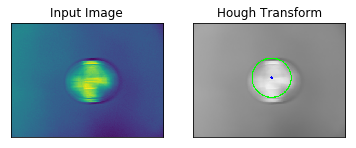

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import data


# bgr_img = cv2.imread('b.jpg') # read as it is
image = data.clock()


if image.shape[-1] == 3:           
    print('color image')
    b,g,r = cv2.split(bgr_img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    print('gray image')
    gray_img = image

img = cv2.medianBlur(gray_img, 5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,
                           cv2.HOUGH_GRADIENT,
                           dp=10,
                           minDist=200,
                           param1=50,
                           param2=30,
                           minRadius=10,
                           maxRadius=100)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.subplot(121),plt.imshow(gray_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cimg)
plt.title('Hough Transform'), plt.xticks([]), plt.yticks([])
plt.show()